# Project: Diabetes Risk Factor Analysis

### _Import of the necessary libraries for this project_

In [656]:
%matplotlib inline
import matplotlib.pyplot as plt

In [657]:
import numpy as np
import pandas as pd

## Step 1: Data Cleaning & Preparation

### Dataset Description

The Pima Indians Diabetes dataset contains medical diagnostic measurements of female patients of Pima Indian heritage, aged 21 or older.

In [ ]:
diabetes_df = pd.read_csv('../data/diabetes.csv')

In [690]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##### Check columns

In [691]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [692]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

* All columns are numeric.

In [693]:
diabetes_df.shape

(768, 9)

* 768 rows of data in 9 columns.

In [694]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Handle missing data

In [695]:
diabetes_df.isnull().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [696]:
(diabetes_df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

1. Glucose (5 zeros): Not biologically valid. --mg/dL
2. BloodPressure (35 zeros): An extremely dangerous state of severe hypotension or an error. (metadata not clear). --mmHg
3. SkinThickness(227 zeros): An error or severe low body fat (metadata not clear). --mm
4. Insulin (374 zeros): Unphysiologically low and usually connected to type 1 diabetes. --μU/mL
5. BMI (11 zeros): BMI cannot be 0. --kg/m²

In [697]:
# 1. remove glucose=0 rows, since they are a few and won't affect much the overall analysis
diabetes_df = diabetes_df[diabetes_df['Glucose'] != 0]

In [698]:
# 5. remove BMI=0 rows, since they are a few and won't affect much the overall analysis
diabetes_df = diabetes_df[diabetes_df['BMI'] != 0]

In [699]:
# Here we are at borderline as metadata is not clear
# Impute blood pressure column with median value
# convert 0 values to nan
diabetes_df['BloodPressure'] = diabetes_df['BloodPressure'].replace(0, np.nan)
diabetes_df['BloodPressure'] = diabetes_df['BloodPressure'].fillna(diabetes_df['BloodPressure'].median())


In [700]:
# Check again
(diabetes_df == 0).sum()

Pregnancies                 108
Glucose                       0
BloodPressure                 0
SkinThickness               218
Insulin                     360
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     488
dtype: int64

In [701]:
# Renamed columns for readability
diabetes_df.rename(columns={'Pregnancies': 'NrTimesPregnant',
                            'Glucose': 'PlasmaGlucoseConcentration',
                            }, inplace=True)
diabetes_df

,NrTimesPregnant,PlasmaGlucoseConcentration,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180,32.9,0.171,63,0
764,2,122,70.0,27,0,36.8,0.340,27,0
765,5,121,72.0,23,112,26.2,0.245,30,0
766,1,126,60.0,0,0,30.1,0.349,47,1


In [702]:
# Add metrics of measurements to columns
diabetes_df.rename(columns={'BloodPressure': 'BloodPressure (mm Hg)',
                            'PlasmaGlucoseConcentration': 'PlasmaGlucoseConcentration (mg/dL)',
                            'SkinThickness':'SkinThickness (mm)',
                            'Insulin':'Insulin (μU/mL)',
                            'BMI':'BMI (kg/m²)',
                            'Age':'Age (years)'
                            }, inplace=True)
diabetes_df

,NrTimesPregnant,PlasmaGlucoseConcentration (mg/dL),BloodPressure (mm Hg),SkinThickness (mm),Insulin (μU/mL),BMI (kg/m²),DiabetesPedigreeFunction,Age (years),Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180,32.9,0.171,63,0
764,2,122,70.0,27,0,36.8,0.340,27,0
765,5,121,72.0,23,112,26.2,0.245,30,0
766,1,126,60.0,0,0,30.1,0.349,47,1


## Step 2: Exploratory Data Analysis (EDA)

In [703]:
# Initial statistics
# Mean age
mean_age = diabetes_df['Age (years)'].mean()
print('Mean patient age is:', mean_age)

Mean patient age is: 33.3125


In [704]:
# Median blood pressure
median_blood_pressure = diabetes_df['BloodPressure (mm Hg)'].groupby(diabetes_df['Outcome']).median()
print(f'Median diastolic blood pressure (mm Hg) of a patient grouped by {median_blood_pressure}')

Median diastolic blood pressure (mm Hg) of a patient grouped by Outcome
0    71.0
1    74.0
Name: BloodPressure (mm Hg), dtype: float64


In [705]:
# Possible levels of insulin
min_insulin = diabetes_df['Insulin (μU/mL)'].min()
max_insulin = diabetes_df['Insulin (μU/mL)'].max()
print(f'2-Hour serum insulin (mu U/ml) intake of patients varies from {min_insulin} to {max_insulin}')

2-Hour serum insulin (mu U/ml) intake of patients varies from 0 to 846


### Distributions

In [706]:
plt.style.available
plt.style.use('ggplot')

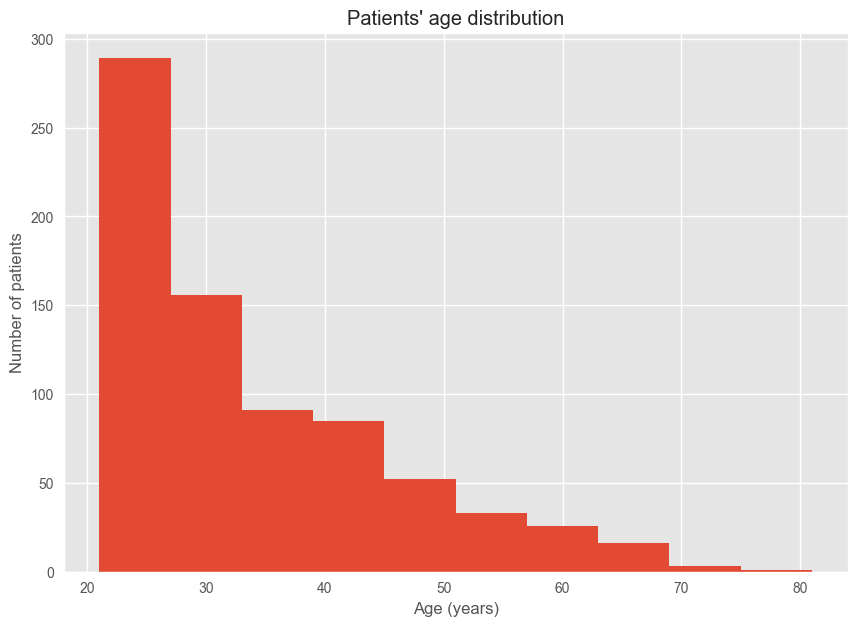

In [709]:
# Age histogram
fig, ax = plt.subplots()
ax.hist(diabetes_df['Age (years)'])
ax.set(xlabel='Age (years)',
       ylabel='Number of patients',
       title='Patients\' age distribution');

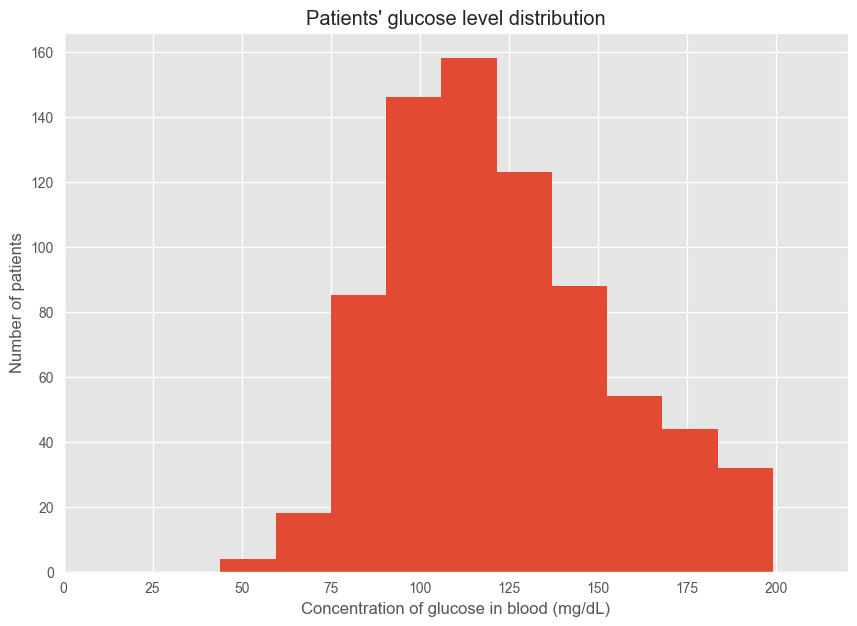

In [712]:
# Glucose levels histogram
fig, ax = plt.subplots()
ax.hist(diabetes_df['PlasmaGlucoseConcentration (mg/dL)'])
ax.set(xlabel='Concentration of glucose in blood (mg/dL)',
       ylabel='Number of patients',
       title='Patients\' glucose level distribution');
ax.set_xlim([0,220]);

## Step 3: Visualizations I

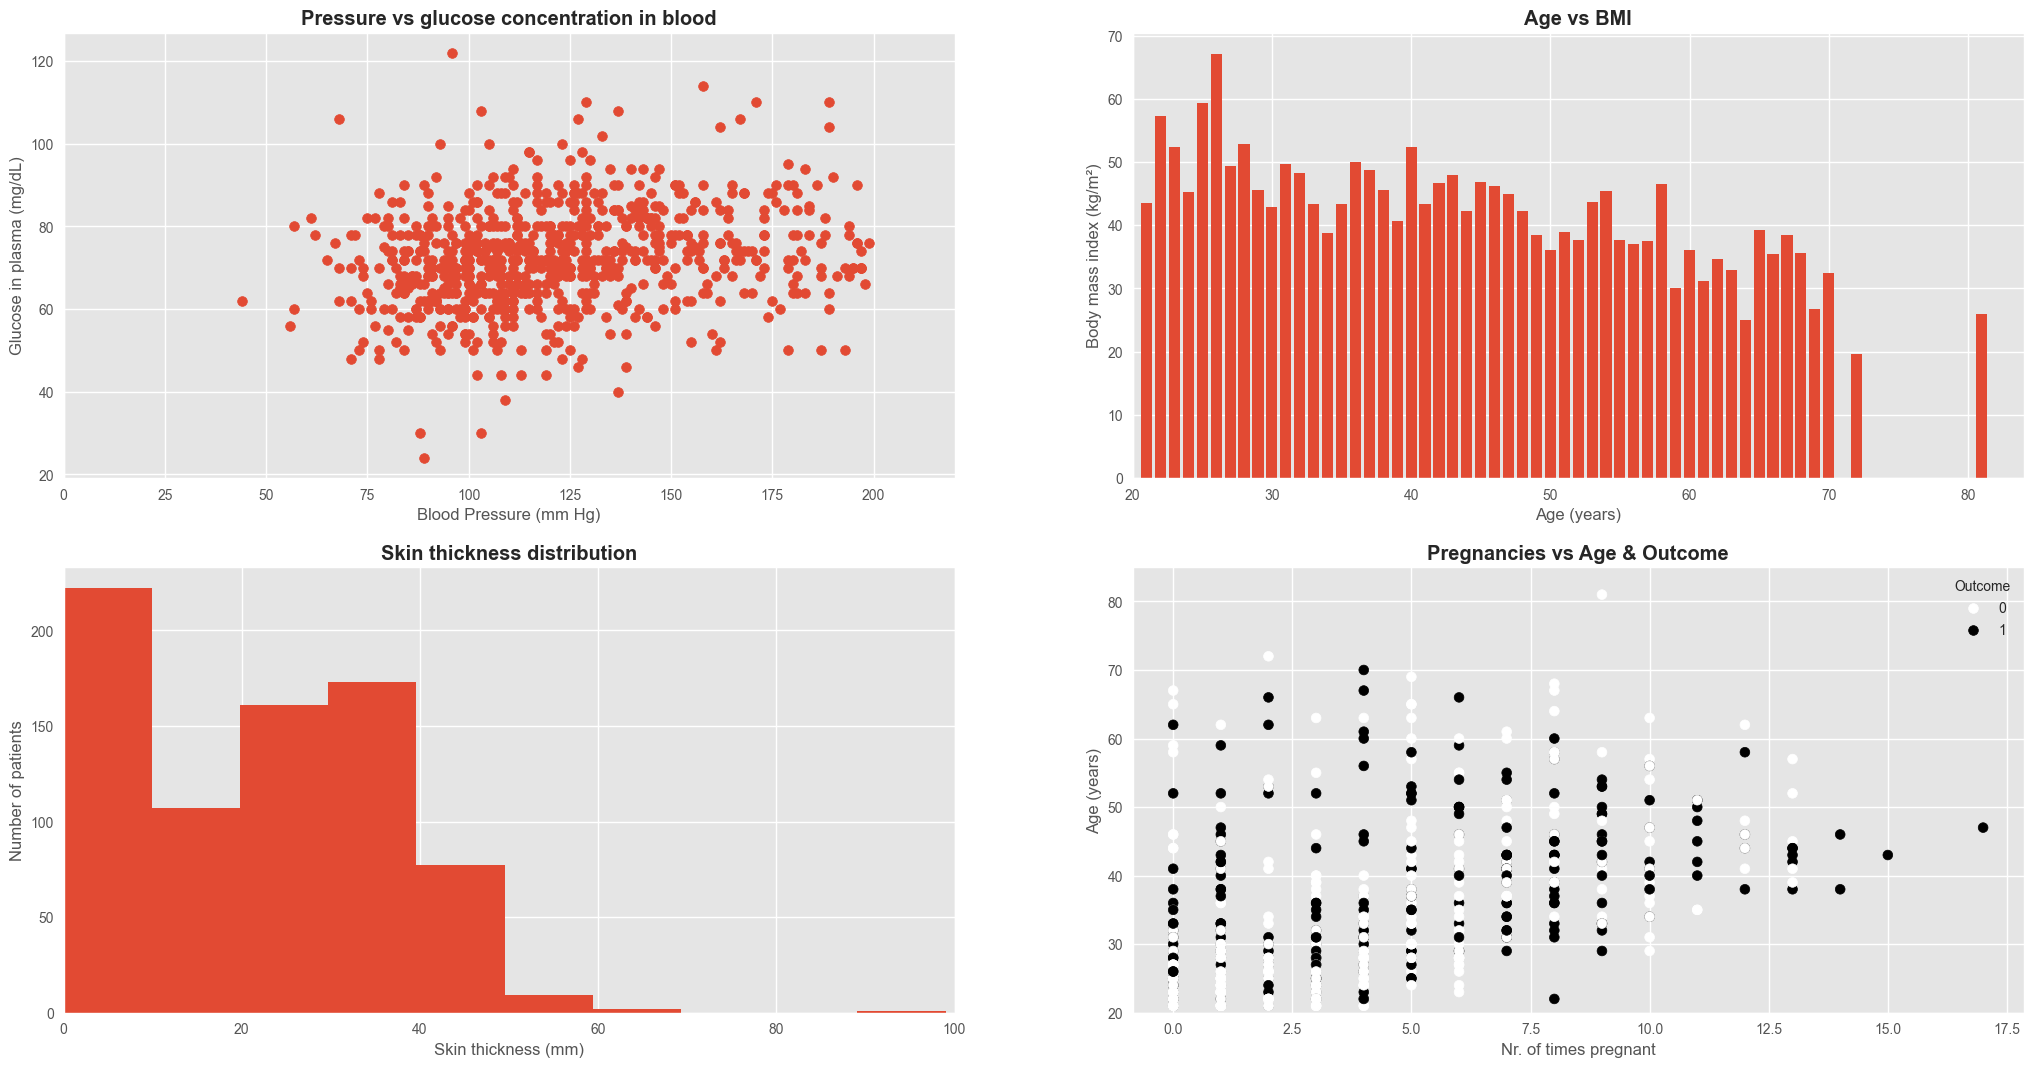

In [714]:
# Plots of BMI, glucose, skin thickness, pregnant
fig, ((ax0, ax1), (ax2,ax3)) = plt.subplots(nrows=2,
                                            ncols=2,
                                            figsize=(20,10)
                                            );
ax0.scatter(diabetes_df['PlasmaGlucoseConcentration (mg/dL)'],  
            diabetes_df['BloodPressure (mm Hg)']);
ax0.set(xlabel='Blood Pressure (mm Hg)',
        ylabel='Glucose in plasma (mg/dL)')
ax0.set_title('Pressure vs glucose concentration in blood', fontweight='bold')
ax0.set_xlim([0,220])

ax1.bar(diabetes_df['Age (years)'],  diabetes_df['BMI (kg/m²)']);
ax1.set(xlabel='Age (years)', 
        ylabel='Body mass index (kg/m²)')
ax1.set_title('Age vs BMI', fontweight='bold')
ax1.set_xlim([20,84])

ax2.hist(diabetes_df['SkinThickness (mm)']);
ax2.set(xlabel='Skin thickness (mm)',
        ylabel='Number of patients')
ax2.set_title('Skin thickness distribution', fontweight='bold')
ax2.set_xlim([0,100])

last_plot= ax3.scatter(diabetes_df['NrTimesPregnant'], diabetes_df['Age (years)'], c=diabetes_df['Outcome']);
ax3.set(xlabel='Nr. of times pregnant',
        ylabel='Age (years)');
ax3.legend(*last_plot.legend_elements(), title='Outcome');
ax3.set_title('Pregnancies vs Age & Outcome',fontweight='bold');
ax3.set_ylim([20,85]);

In [715]:
diabetes_df.head()

,NrTimesPregnant,PlasmaGlucoseConcentration (mg/dL),BloodPressure (mm Hg),SkinThickness (mm),Insulin (μU/mL),BMI (kg/m²),DiabetesPedigreeFunction,Age (years),Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1


#### Initial Findings:
* Pressure vs Glucose:    
Blood pressure and glucose show no strong correlation together, but many patients cluster around normal ranges.
* Age vs BMI:    
Younger patients show higher variability in BMI, while older patients tend toward more moderate values.
* Skin Thickness distribution:    
Most patients have skin thickness below 40 mm.
* Pregnancies vs Age:    
The number of pregnancies increases with age, but diabetes outcome occurs across all ages and pregnancy counts.

## Step 3: Visualization II

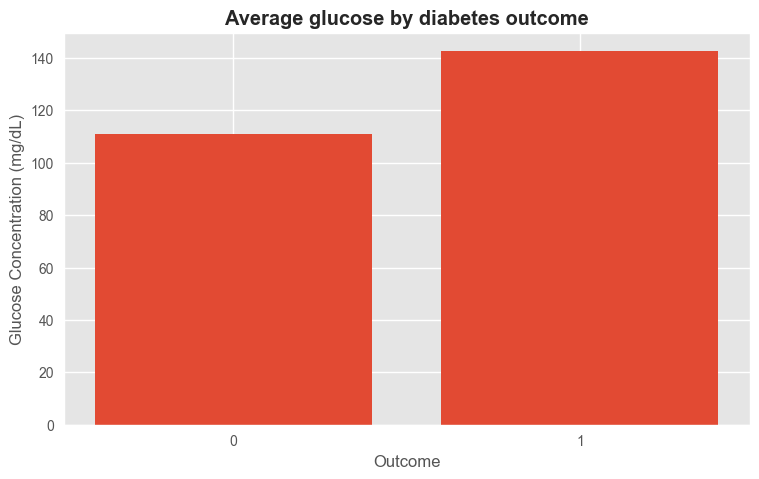

In [716]:
# Average glucose for diabetic/ non-diabetic people
fig, ax = plt.subplots(figsize=(7,4))

# Create series of index='outcome', value='mean of plasma concentration'
avg_glucose_levels = diabetes_df.groupby('Outcome')['PlasmaGlucoseConcentration (mg/dL)'].mean()

ax.bar(avg_glucose_levels.index, avg_glucose_levels.values)
ax.set(xlabel='Outcome',
       ylabel='Glucose Concentration (mg/dL)')

# x ticks are at the same time labels here: 
# 0 and 1 ->the name of rows
ax.set_xticks(avg_glucose_levels.index)

ax.set_title("Average glucose by diabetes outcome", fontweight="bold")
ax.legend();

Outcome
0    30.876434
1    35.371970
Name: BMI (kg/m²), dtype: float64

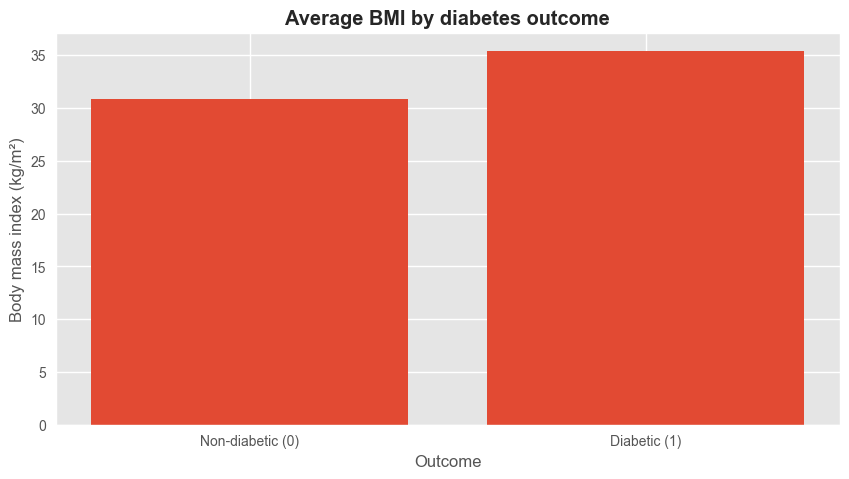

In [717]:
# Average BMI for diabetics vs non-diabetics
fig, ax = plt.subplots(figsize=(8,4))

# Series of index(rows)='outcome', value(columns)='mean of plasma concentration'
avg_bmi_levels = diabetes_df.groupby('Outcome')['BMI (kg/m²)'].mean()

ax.bar(avg_bmi_levels.index, avg_bmi_levels.values)
ax.set(xlabel='Outcome',
       ylabel='Body mass index (kg/m²)'
       )

# x ticks indexes: 0 and 1
ax.set_xticks(avg_bmi_levels.index)

# x ticks labels
labels = pd.Series(['Non-diabetic (0)','Diabetic (1)'])
ax.set_xticklabels(labels)

ax.set_title("Average BMI by diabetes outcome", fontweight="bold");

# the series have rows:0,1 and columns: mean values
avg_bmi_levels

##### Proportion of patients with diabetes by age group


In [718]:
# 20-30, 31-40, 41-50, 51-60, 61-70, 71-80
# 1. Age groups: new column
diabetes_df['AgeGroup (years)'] = pd.cut(
    diabetes_df['Age (years)'],
    bins= [20,30,40,50,60,70,80],
    labels=["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]
) 

In [719]:
# 2. Cross tabulation of 2 columns in a new dataframe
age_outcome_df = pd.crosstab(diabetes_df["AgeGroup (years)"], diabetes_df["Outcome"])
age_outcome_df.head()

Outcome,0,1
AgeGroup (years),,
20-29,316,89
30-39,81,75
40-49,49,63
50-59,23,30
60-69,17,7


* A specific dataframe with index column names of 0 and 1.

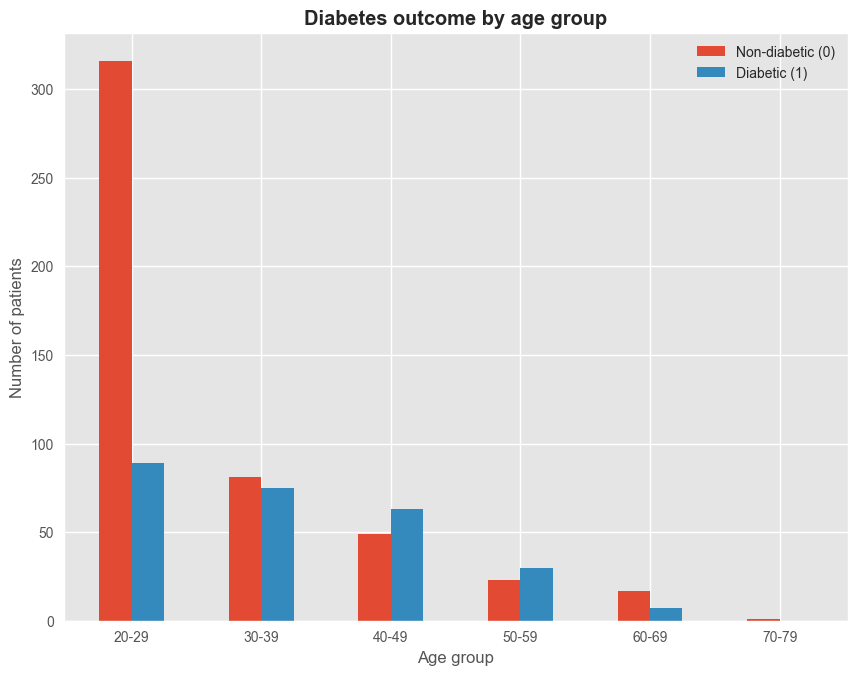

In [720]:
# Grouped bar chart
fig, ax = plt.subplots(figsize=(8,6))

# age_outcome.index returns age categories
# arange: return evenly spaced values for 6 categories of age groups
# x is [0 1 2 3 4 5]
x = np.arange(len(age_outcome_df.index)) 
width = 0.25 #bar width

# 2 barplots next to each other
ax.bar(x - width/2, age_outcome_df[0], width, label="Non-diabetic (0)")
ax.bar(x + width/2, age_outcome_df[1], width, label="Diabetic (1)")

ax.set_xticks(x)
ax.set_xticklabels(age_outcome_df.index)  #age groups are indexes

ax.set_title("Diabetes outcome by age group", fontweight="bold")
ax.set_xlabel("Age group")
ax.set_ylabel("Number of patients")
ax.legend();

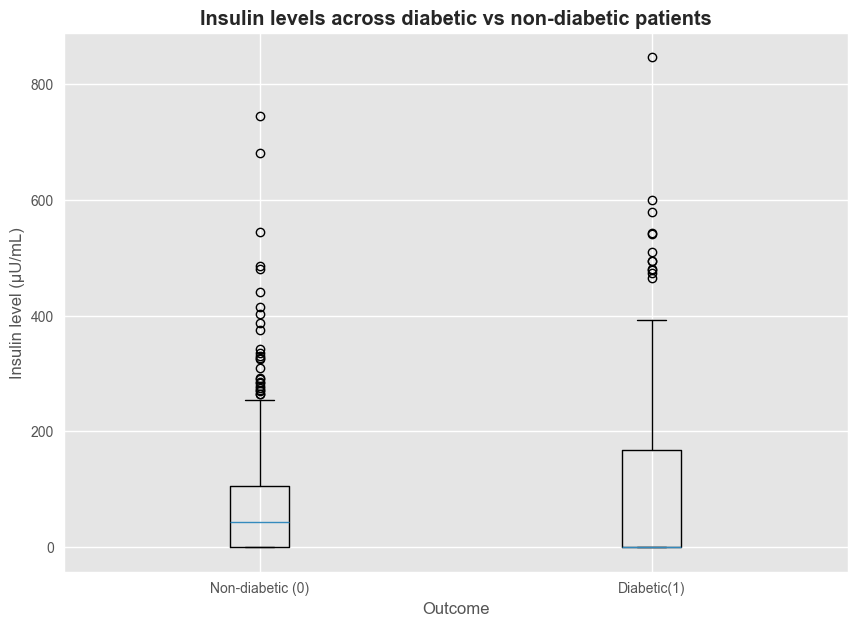

In [723]:
# Boxplot: insulin levels across diabetic vs non-diabetic patients

fig, ax = plt.subplots()

ax.boxplot(
    [diabetes_df.loc[diabetes_df['Outcome'] == 0, 'Insulin (μU/mL)'],
     diabetes_df.loc[diabetes_df['Outcome'] == 1, 'Insulin (μU/mL)']]
);


ax.set_xticklabels(['Non-diabetic (0)','Diabetic(1)'])  

ax.set_title("Insulin levels across diabetic vs non-diabetic patients", fontweight="bold")
ax.set_xlabel("Outcome")
ax.set_ylabel("Insulin level (μU/mL)");


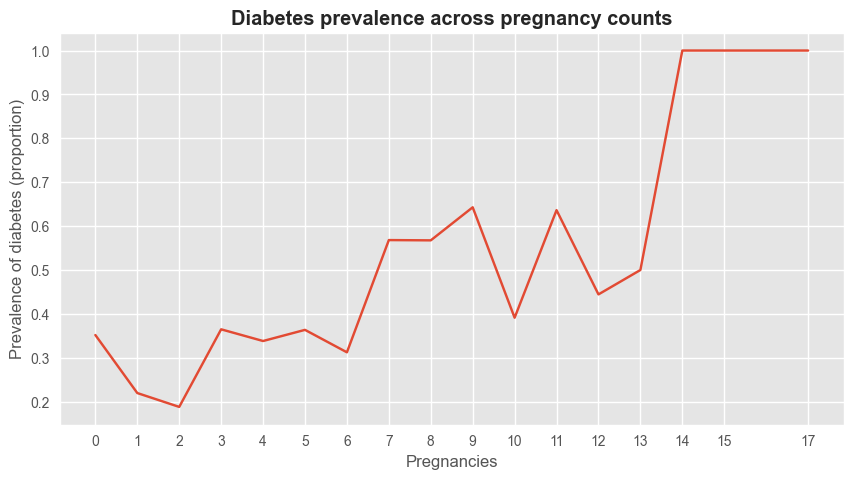

In [724]:
# line plot: diabetes prevalence across pregnancy counts

# group by pregnancies 
# take mean of Outcome (since 0/1, mean = prevalence)
preg_prevalence = diabetes_df.groupby("NrTimesPregnant")["Outcome"].mean()

fig, ax = plt.subplots(figsize=(8,4))

# # number of pregnancies from 0-17
ax.set_xticks(preg_prevalence.index)

ax.plot(preg_prevalence.index, preg_prevalence.values)


ax.set_title("Diabetes prevalence across pregnancy counts", fontweight="bold")
ax.set_xlabel("Pregnancies")
ax.set_ylabel("Prevalence of diabetes (proportion)");



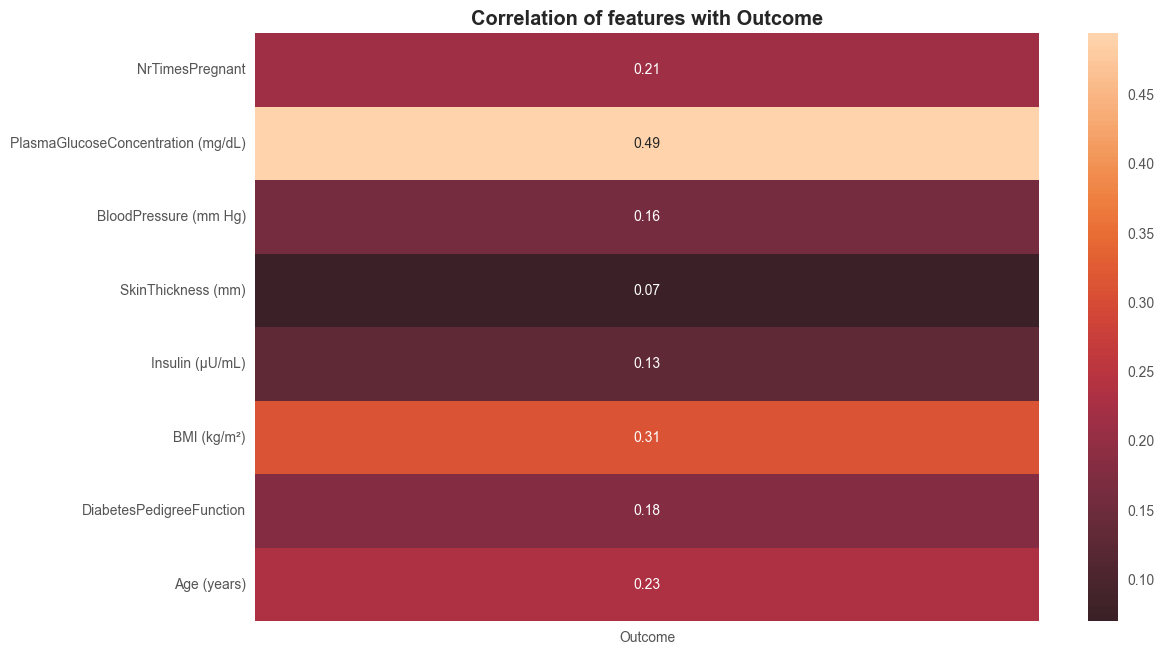

In [725]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,6))

# compute correlations for all columns
corrs = diabetes_df.corr(numeric_only=True)

# extract only the correlations with Outcome
outcome_corr = corrs["Outcome"].drop("Outcome")  # drop self-correlation

ax.set_title("Correlation of features with Outcome", fontweight="bold")

sns.heatmap(outcome_corr.to_frame(), 
            annot=True, center=0, ax=ax);

## Step 4: Analysis & Insights

Based on the exploratory data analysis and visualizations, we can see some important insights:

#### 1. Age and Diabetes Prevalence
- The dataset is skewed toward younger patients, with most between 20–30 years old.  
- However, the **proportion of diabetes cases increases with age**. Patients above 40 show noticeably higher prevalence.

#### 2. Glucose as a Primary Risk Factor
- **Glucose levels are the strongest predictor of diabetes.**  
- Diabetic patients show much higher average glucose than non-diabetics.  
- This aligns with medical knowledge: impaired glucose regulation is central to diabetes.

#### 3. Body Mass Index (BMI)
- Diabetic patients have a **higher average BMI** compared to non-diabetics.  
- This suggests obesity plays a significant role in diabetes risk.  

#### 4. Pregnancies
- Diabetes prevalence tends to increase with the number of pregnancies.  
- Women with more than 7 pregnancies show a noticeably higher risk.  
- This might be related to gestational diabetes and long-term risk.

#### 5. Insulin and Skin Thickness
- Both features show **weak direct correlations** with diabetes outcome.  
- The presence of extreme values in the Insulin-boxplot suggests that **insulin alone is not a strong distinguishing factor** between diabetic and non-diabetic patients.  
- They may still be important in combination with other features.

#### 6. Correlation Heatmap
- **Plasma Glucose Concentration** has the highest correlation with Outcome (~0.49).  
- **BMI** and **Age** show moderate positive correlations (~0.31 and ~0.23).  
- Other features (Blood Pressure, Insulin, Skin Thickness) show weak correlations (<0.2).  
- This confirms that glucose, BMI, and age are the most informative factors for predicting diabetes.

---

### Step 5: Conclusions
- **High glucose levels** are the clearest indicator of diabetes.  
- **BMI and age** are strong supporting risk factors.  
- **Number of pregnancies** is also positively associated with diabetes risk.  
- Other features (blood pressure, insulin, skin thickness) are not individually strong predictors in this dataset.  

Together, these findings highlight that **diabetes is strongly influenced by metabolic factors (glucose, BMI), demographic factors (age), and reproductive history (pregnancies)**.
